In [ ]:
!pip install qiskit

In [ ]:
from qiskit.providers.aer import QasmSimulator  
from qiskit.providers.aer import AerSimulator
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA 
from qiskit.circuit.library import EfficientSU2
# opflow is Qiskit's module for creating operators like yours
from qiskit import *
from qiskit.opflow import OperatorBase
from qiskit.opflow import Z, X, I  # Pauli Z, X matrices and identity
import pylab
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
  
  counts.append(eval_count)
  values.append(mean)

In [ ]:
def run(B_X = 1, J_z = 1, B_Z = 1):
    master_counts = []
    master_values = []
    # for h in range (1,5,1): 
    #     h=+h

    # Initialization
    B_X = B_X
    J_z = J_z
    B_Z = B_Z

    # or whatever value you have for h
    H = - B_X * ((X ^ I ^ I ^ I) + (I ^ X ^ I ^ I) + (I ^ I ^ X ^ I) + (I ^ I ^ I ^ X)) + J_z * ((Z ^ Z ^ I ^ I ) + (I ^ Z ^ Z ^ I) + (I ^ I ^ Z ^ Z) + (Z ^ I ^ I ^ Z)) - B_Z * ((Z ^ I ^ I ^ I) + (I ^ Z ^ I ^ I) + (I ^ I ^ Z ^ I ) + (I ^ I ^ I ^ Z))
   
    # you can swap this for a real quantum device and keep the rest of the code the same!
    backend = QasmSimulator() 

    # COBYLA usually works well for small problems like this one
    optimizer = COBYLA(maxiter=200)

    # EfficientSU2 is a standard heuristic chemistry ansatz from Qiskit's circuit library
    ansatz = EfficientSU2(4, reps=1)

    # set the algorithm
    vqe = VQE(ansatz, optimizer, quantum_instance=backend, callback=store_intermediate_result)

    # run it with the Hamiltonian we defined above
    result = vqe.compute_minimum_eigenvalue(H)  

    # print the result (it contains lot's of information)
    # print(result) 

run()

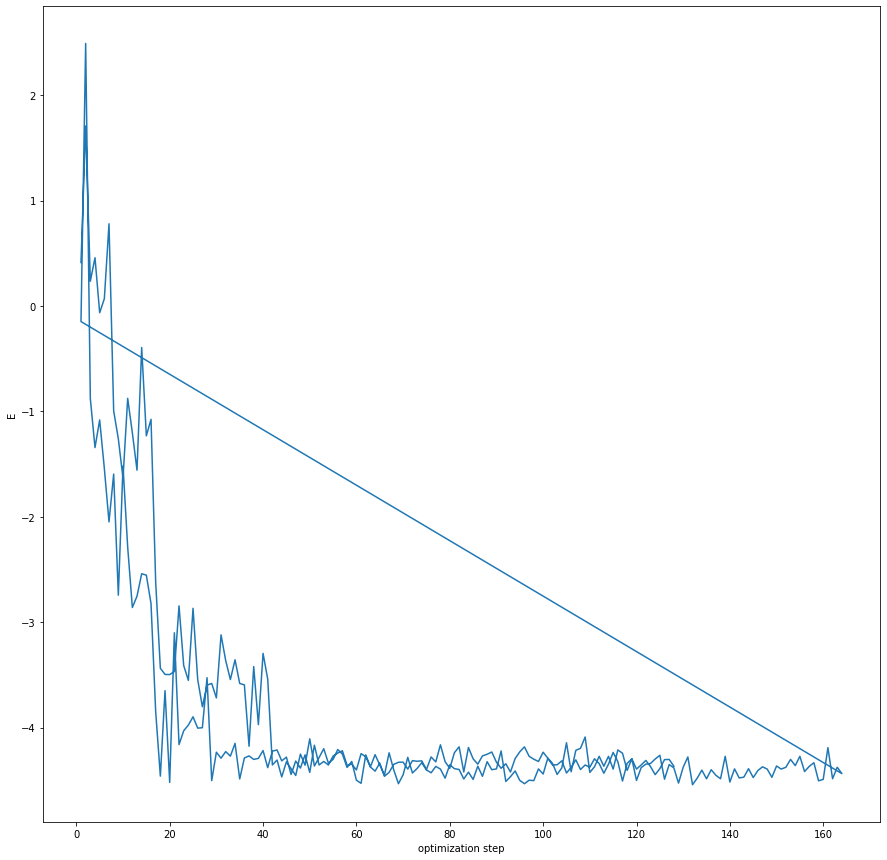

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(counts,values)
plt.xlabel('optimization step')
plt.ylabel('E')
plt.show()

In [ ]:
import pickle

counts_values = {}

for i in range(0, 20, 1):
    for j in range(0, 20, 1):
        print(f"Running VQE for BX : {i/10} & BZ : {j/10}")
        counts = []
        values = []
        run(B_X = i/10, J_z = 1, B_Z = j/10)
        counts_values[f"BX_{i/10} BZ_{j/10}"] = {"counts": counts, "values": values} 


print("Saving Optimization History")
with open('optimization_data.pickle', 'wb') as handle:
    pickle.dump(counts_values, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
with open('optimization_data.pickle', 'rb') as handle:
    counts_values = pickle.load(handle)

data = []
for keys, values in counts_values.items():
    data += dict( [ zip(values['counts'], values['values']) ] )

# arr = np.asarray(data)
# print(data)


ValueError: ignored

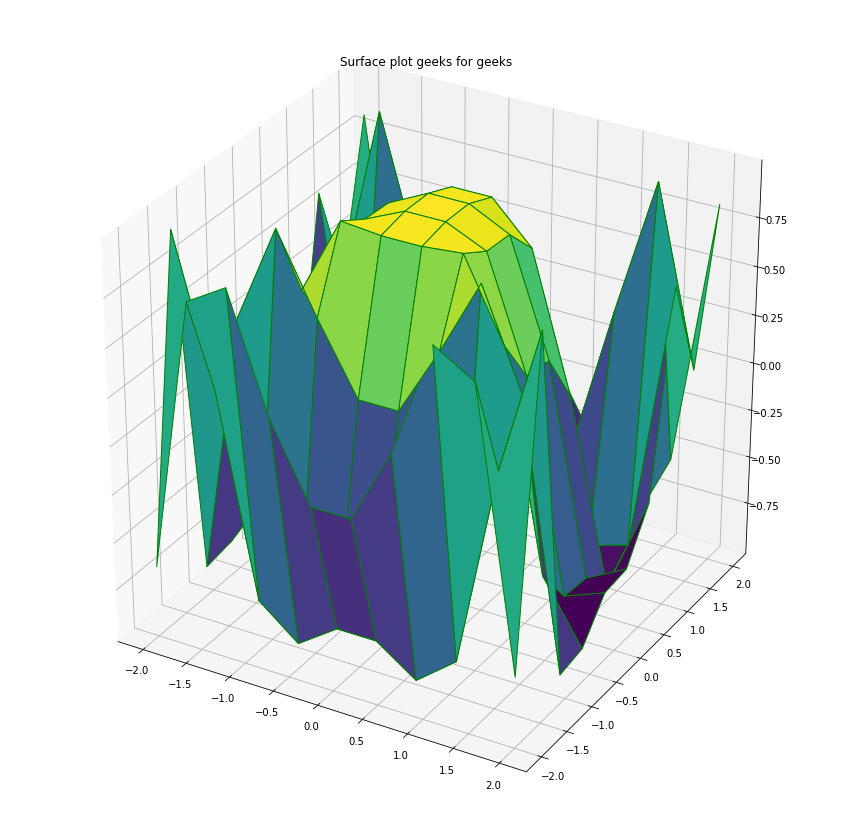

In [ ]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
  
# defining surface and axes
x = np.outer(np.linspace(-2, 2, 10), np.ones(10))
y = x.copy().T
z = np.cos(x ** 2 + y ** 3)
  
fig = plt.figure(figsize=(15,15))
  
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
  
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='green')
ax.set_title('Surface plot geeks for geeks')
plt.show()

In [ ]:
x[3]

array([-0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667,
       -0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667])

In [ ]:
# for x in data:
#     print(len(x))
data

IndexError: ignored